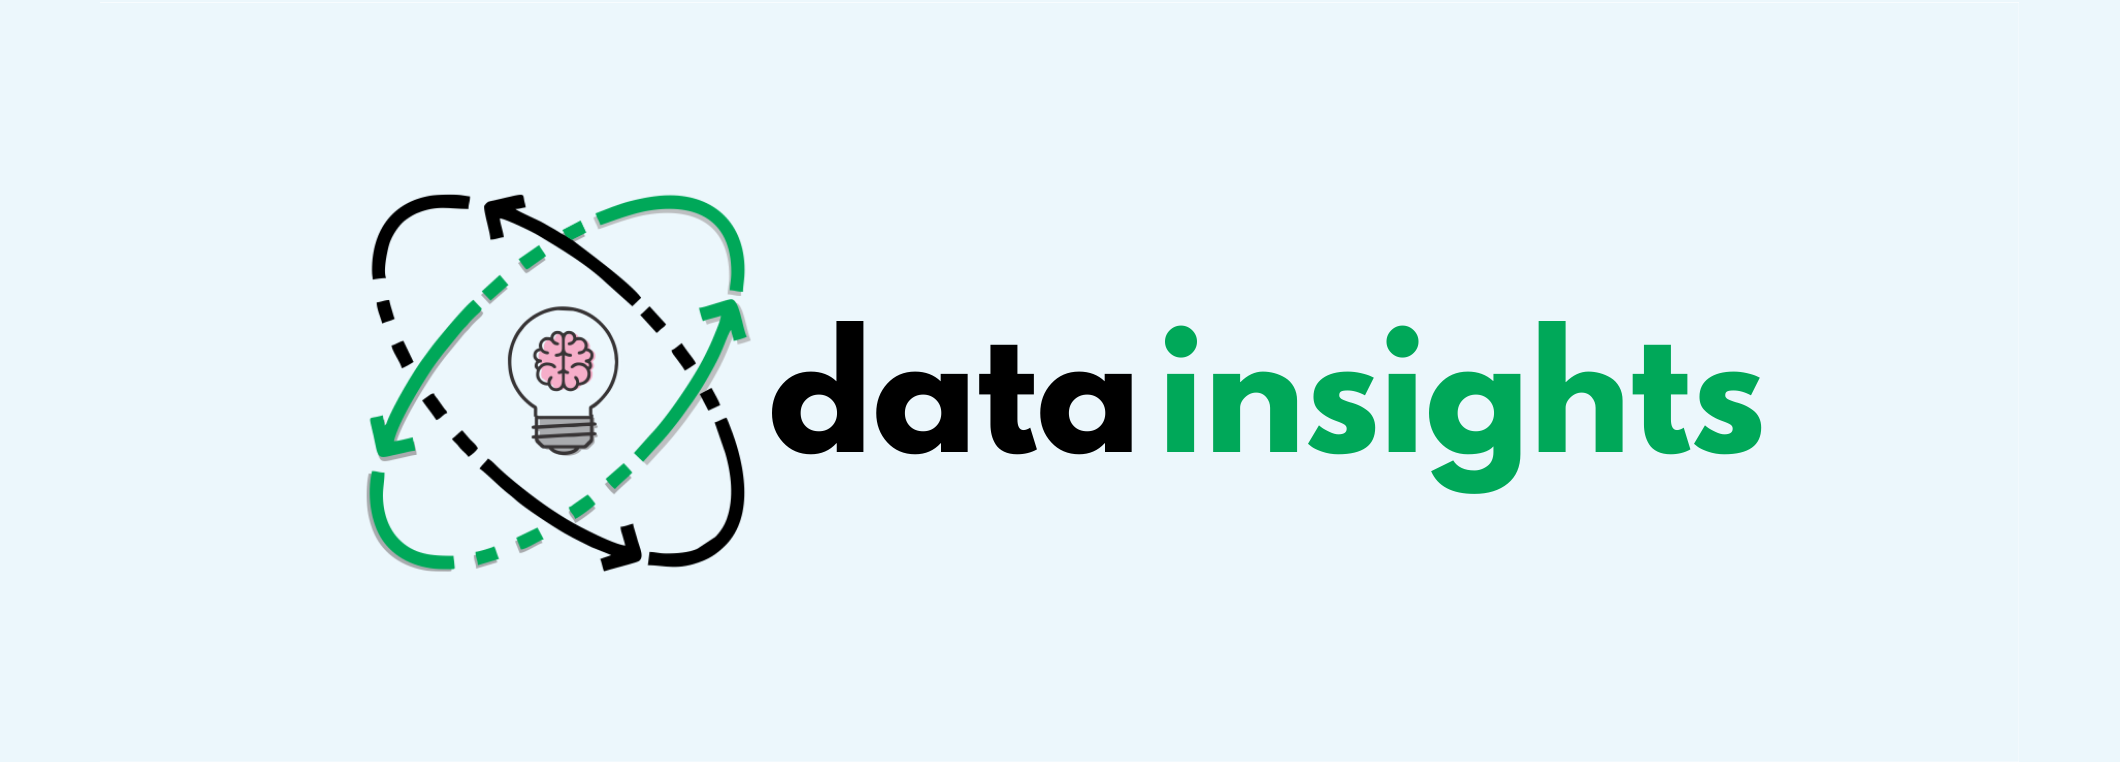

<h1 style="text-align: center; color: #00A859"> Projeto Análise Exploratória de Dados
Socioeconômicos </h1>

<div class="alert alert-block alert-info" style="background-color: #EDF8FD; color: #4F4F4F;" ><font size="3">
    <h3>Project Description:</h3> 

A análise de dados socioeconômicos é uma atividade fundamental para qualquer empresa que busca compreender como as mudanças no cenário podem impactar suas estratégias corporativas e, consequentemente, auxilia na tomada de decisões mais informadas e assertivas.

A descrição dos dados utilizados estão no arquivo <a style="text-decoration: none;" href="https://github.com/anamariapego/AnaliseExploratoria_SocioEconomico/blob/main/01-Documentacao/DictionaryData.ipynb">DictionaryData.ipynb</a>  na pasta 01-Documentacao. 
</font> 
</div>

<font size="5"><a id="sumario"><bold>Summary</bold></a></font>
***
>1. [Importação das Bibliotecas](#ses1)
>2. [Funções](#ses2)
>3. [Carregando os Dados](#ses3)
>4. [Limpeza/Processamento dos Dados](#ses4)
>5. [Análisando os dados e Respondendo as Perguntas](#ses5)

<font size="5"><a id="ses1"><bold>Imports</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3> 

Importações das bibliotecas utilizadas para o desenvolvimento desse notebook e algumas configurações de saídas de códigos.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
from glob import glob
from sklearn.impute import SimpleImputer

In [2]:
# Versão da Linguagem Python

from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())
print("")

# Versões de pacotes utilizados 

%reload_ext watermark
%watermark -a "Data Scientist" --iversions

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.8

Author: Data Scientist

pandas    : 1.5.2
numpy     : 1.22.4
seaborn   : 0.12.1
matplotlib: 3.6.2



In [3]:
# Para ignorar mensagens de alertas 

warnings.filterwarnings('ignore')

%config Completer.use_jedi = False

# Visualizar todas as colunas do dataset

pd.set_option('display.max_columns', None)

<font size="5"><a id="ses2"><bold>Funções</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3>

Funções desenvolvidas para facilitar a análise.

In [4]:
def clean_columns (x: pd.DataFrame):
    """
    Função para limpar e organizar os nomes das colunas
    
    x: dataframe no qual os nomes das colunas serão limpadas 
    
    """
    if isinstance(x, pd.DataFrame):
        x.columns = x.columns.str.replace(" ", "_").str.title().str.strip().str.lower()
    
    else:
        raise Exception('O tipo da variável deve ser pandas.core.frame.DataFrame. O tipo dado foi: {}'.format(type(x)))

In [5]:
def rename_columns(df: pd.DataFrame, new_columns: list):
    """
    Função para renomear as colunas de um DataFrame de acordo com uma lista de nomes definidas
    
    df: dataframe no qual as colunas serão renomeadas
    new_columns: lista com os novos nomes das colunas, na ordem desejada
    
    """
    if isinstance(df, pd.DataFrame):
        if len(new_columns) == len(df.columns):
            df.columns = new_columns
        else:
            raise ValueError('A lista de novos nomes deve ter o mesmo número de elementos que o número de colunas do DataFrame')
    else:
        raise TypeError('O tipo da variável deve ser pandas.core.frame.DataFrame. O tipo dado foi: {}'.format(type(df)))


In [6]:
def plot_chart(data, chart_type, x_column, y_column, color=None, title='', xlabel='', ylabel=''):
    
    """
    Função com configurações gerais para plotar gráfico
    
    """
    
    plt.figure(figsize=(12, 6))
    chart_func = getattr(sns, chart_type)
    
    if color:
        chart_func(data=data, x=x_column, y=y_column, color=color)
    else:
        chart_func(data=data, x=x_column, y=y_column)
    
    plt.title(title, loc='left', size=15, pad=20)
    plt.xlabel(xlabel, size=12)
    plt.ylabel(ylabel, size=12)
    sns.despine()
    plt.show()

In [ ]:
def format_dataframe(df, titulo='', column_align=''):
    
    styles = [
        dict(selector="caption", props=[("font-size", "130%"),
                                         ("font-weight", "bold"),
                                         ("color", "#006373")]),
        {'selector': 'th', 'props': [('text-align', 'left')]},
    ]
    df = df.style.set_caption(titulo).set_table_styles(styles).format({
        column_align: lambda x: '<div style="text-align: left">{}</div>'.format(x)
    })
    return df

<font size="5"><a id="ses3"><bold>Carregamento</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3>

Carregando os dados.

In [7]:
# Caminho dos dados 

path = r"C:/Projetos/AnaliseExploratoria_SocioEconomico/02-CodigoFonte/00-DataSets/"

In [8]:
data_socio = pd.read_csv(path + 'dataset.csv')
data_socio.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<font size="5"><a id="ses4"><bold>Processamento/Limpeza dos dados</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3>

Sessão para fazer os processamentos e limpezas necessárias dos dados antes das análises.

In [9]:
# Dimensão do dataset (linhas e colunas)

data_socio.shape

(1949, 11)

In [10]:
# Limpando e padronizando os nomes das colunas 

clean_columns(data_socio)

In [11]:
# estatística básica

data_socio.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [12]:
# Valores ausentes

data_socio[data_socio.isnull().any(axis=1)]

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
66,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390,0.843,0.238
110,Bahrain,2012,5.027,10.716,0.911,66.86,0.682,NaN,0.438,0.589,0.381
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228
1917,Yemen,2017,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,0.455,0.295
1918,Yemen,2018,3.058,NaN,0.789,56.70,0.553,NaN,0.793,0.461,0.315


In [13]:
# Porcentagem por coluna de valores ausentes

percent_missing = data_socio.isnull().sum() * 100 / len(data_socio)

missing_value_df = pd.DataFrame({'qtd_missing': data_socio.isnull().sum(),
                                 'percent_missing': percent_missing,
                                 'column_type': data_socio.dtypes}
                               ).reset_index().rename(columns={'index': 'column_name'})

missing_value_df

,column_name,qtd_missing,percent_missing,column_type
0,country_name,0,0.000000,object
1,year,0,0.000000,int64
2,life_ladder,0,0.000000,float64
3,log_gdp_per_capita,36,1.847101,float64
4,social_support,13,0.667009,float64
5,healthy_life_expectancy_at_birth,55,2.821960,float64
6,freedom_to_make_life_choices,32,1.641868,float64
7,generosity,89,4.566444,float64
8,perceptions_of_corruption,110,5.643920,float64
9,positive_affect,22,1.128784,float64


<h3 style="color: #cca002"><strong>Observação sobre os valores ausentes:</strong></h3>

Como os as porcentagem de valores ausentes são baixos, então será feita uma tratativa de subtituir os valores NAs pela ,média da coluna.

In [14]:
# Substituindo os NAs pela média de cada coluna 

imp_object = SimpleImputer(missing_values=np.nan, strategy='mean')
colunas_object = data_socio.select_dtypes(include=['float64']).columns

data_socio[colunas_object] = imp_object.fit_transform(data_socio[colunas_object])
data_socio.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [15]:
# matriz de correlação 

data_socio[colunas_object].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
life_ladder,1.00,0.78,0.71,0.74,0.53,0.19,-0.42,0.53,-0.30
log_gdp_per_capita,0.78,1.00,0.68,0.83,0.36,-0.00,-0.33,0.30,-0.20
social_support,0.71,0.68,1.00,0.61,0.41,0.07,-0.22,0.43,-0.40
healthy_life_expectancy_at_birth,0.74,0.83,0.61,1.00,0.38,0.02,-0.31,0.31,-0.14
freedom_to_make_life_choices,0.53,0.36,0.41,0.38,1.00,0.32,-0.48,0.60,-0.26
generosity,0.19,-0.00,0.07,0.02,0.32,1.00,-0.28,0.35,-0.09
perceptions_of_corruption,-0.42,-0.33,-0.22,-0.31,-0.48,-0.28,1.00,-0.29,0.26
positive_affect,0.53,0.30,0.43,0.31,0.60,0.35,-0.29,1.00,-0.37
negative_affect,-0.30,-0.20,-0.40,-0.14,-0.26,-0.09,0.26,-0.37,1.00


<span style="color: #cca002">**Obs:**</span>  Antes de iniciar as respostas das perguntas, os nomes das colunas serão remomeadas para melhor compreensão e visualização dos gráficos.

In [16]:
# Definindo os nomes das colunas 

columns_names = ['Pais', 'Ano', 'IndicadorNivelVida', 'PIB_Per_Capita', 'SuporteSocial', 'ExpectativaVida', 
                 'IndicadorLiberdade', 'IndicadorGenerosidade', 'IndicadorCorrupcao', 'IndicadorEmocoesPositivas',
                 'IndicadorEmocoesNegativas']

In [17]:
# Renomeando as colunas

rename_columns(data_socio, columns_names)

<font size="5"><a id="ses5"><bold>Análisando os dados e Respondendo as Perguntas</bold></a></font>

[Voltar](#sumario)

<h3 style="color: #00A859">Section Description</h3>

Sessão para fazer as análises para responder as perguntas levantadas.

<h3><strong>Quais anos aconteceu as pesquisas?</strong></h3>

In [18]:
print("""
    As pesquisas foram realizadas entre os anos de {} à {}.
    """.format(data_socio['Ano'].min(), data_socio['Ano'].min()))


    As pesquisas foram realizadas entre os anos de 2005 à 2005.
    


<h3><strong>Quantos países participaram da pesquisa? </strong></h3>

In [19]:
print("""
    Participaram da pesquisa {} país, inclusive o Brasil.
    """.format(len(data_socio['Pais'].drop_duplicates())))


    Participaram da pesquisa 166 país, inclusive o Brasil.
    


<h3><strong>Quantidade de registros por anos</strong></h3> 

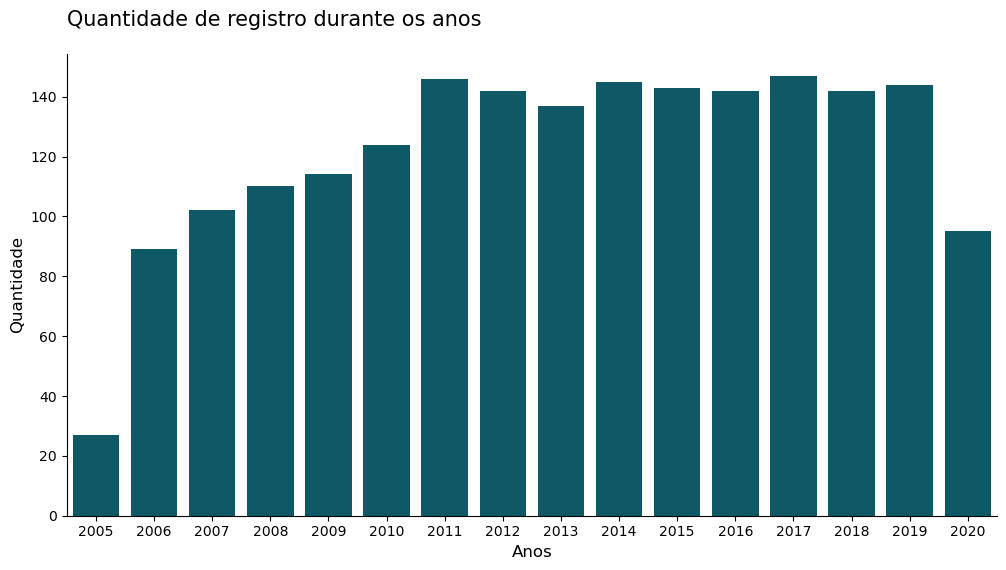

In [20]:
# Plotando o gráfico

plot_chart(data_socio, 'countplot', 'Ano', None, color="#006373", 
           title='Quantidade de registro durante os anos', xlabel='Anos', ylabel='Quantidade')


<h3><strong>O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer? Qual a correlação entre essas duas variáveis?</strong></h3>

In [21]:
# Configurando para fazer as médias por país

df_mean = data_socio.loc[:, data_socio.columns != 'Ano'].groupby('Pais', as_index = False).mean()
df_mean.head()

,Pais,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
0,Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333,0.548667,0.326500
1,Albania,5.019385,9.384385,0.716231,67.546154,0.662923,-0.082692,0.869385,0.653846,0.299231
2,Algeria,5.389875,9.328875,0.804694,65.290000,0.575014,-0.108224,0.705031,0.621125,0.263068
3,Angola,4.420250,8.990000,0.738250,53.550000,0.456250,-0.088250,0.866750,0.613500,0.351250
4,Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,0.833467,0.284000


In [22]:
# Matriz de correlação entre o PIB_Per_Capita e Expectativa de vida

df_mean[['PIB_Per_Capita','ExpectativaVida']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,PIB_Per_Capita,ExpectativaVida
PIB_Per_Capita,1.00,0.83
ExpectativaVida,0.83,1.00


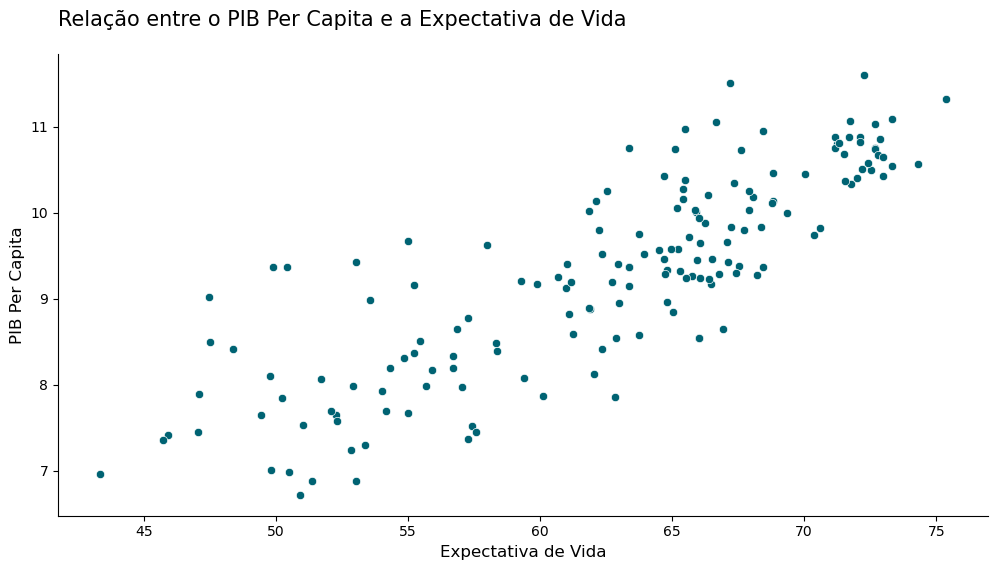

In [23]:
# Plotando o gráfico

plot_chart(df_mean, 'scatterplot', 'ExpectativaVida', 'PIB_Per_Capita', color="#006373", 
           title='Relação entre o PIB Per Capita e a Expectativa de Vida', xlabel='Expectativa de Vida',
           ylabel='PIB Per Capita')

<h3 style="color: #cca002"><strong>Observações:</strong></h3>

Sim, pelo gráfico percebe-se que há uma correlação positiva entre as variáveis. Quando o PIB Per Capita aumenta a expectativa de vida também tende a aumenta também.

<h3><strong>Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?</strong></h3>

In [24]:
# Matriz de correlação entre o indicador de corrupção e expectativa de vida

df_mean[['IndicadorCorrupcao','IndicadorNivelVida']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,IndicadorCorrupcao,IndicadorNivelVida
IndicadorCorrupcao,1.00,-0.41
IndicadorNivelVida,-0.41,1.00


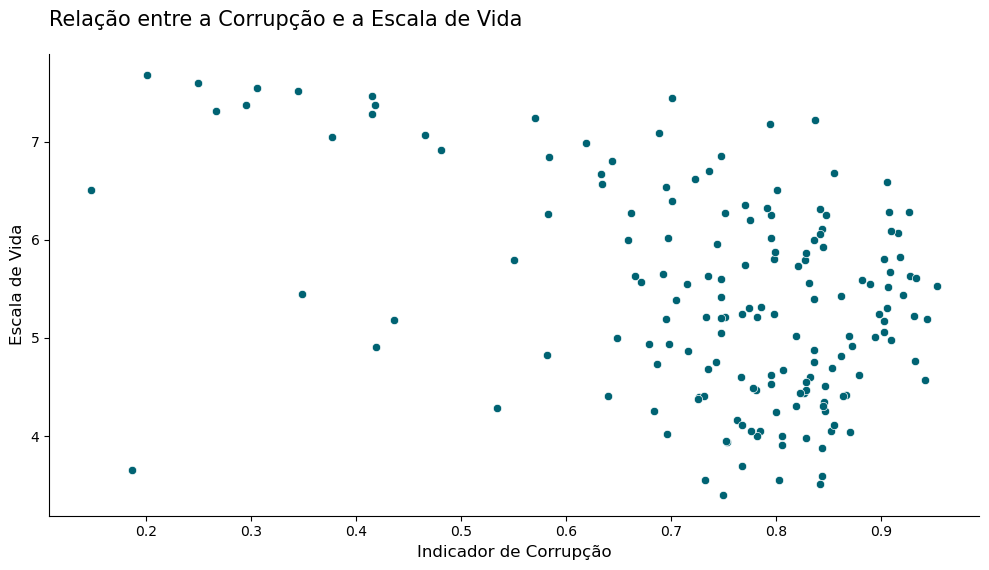

In [25]:
# Plotando o gráfico

plot_chart(df_mean, 'scatterplot', 'IndicadorCorrupcao', 'IndicadorNivelVida', color="#006373", 
           title='Relação entre a Corrupção e a Escala de Vida', xlabel='Indicador de Corrupção',
           ylabel='Escala de Vida')

<h3 style="color: #cca002"><strong>Observações:</strong></h3>

Sim, existe um correlação entre a escala de vida e o índice de corrupção. Nesse caso, uma correlação negativa pois quanto maior é o índice de corrupção menor é a expectativa de vida.

<h3>O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral? Qual a correlação entre essas duas variáveis?<qh3>

In [26]:
# Matriz de correlação entre o indicador de emoções e escala de vida

df_mean[['IndicadorEmocoesPositivas','IndicadorNivelVida']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,IndicadorEmocoesPositivas,IndicadorNivelVida
IndicadorEmocoesPositivas,1.00,0.57
IndicadorNivelVida,0.57,1.00


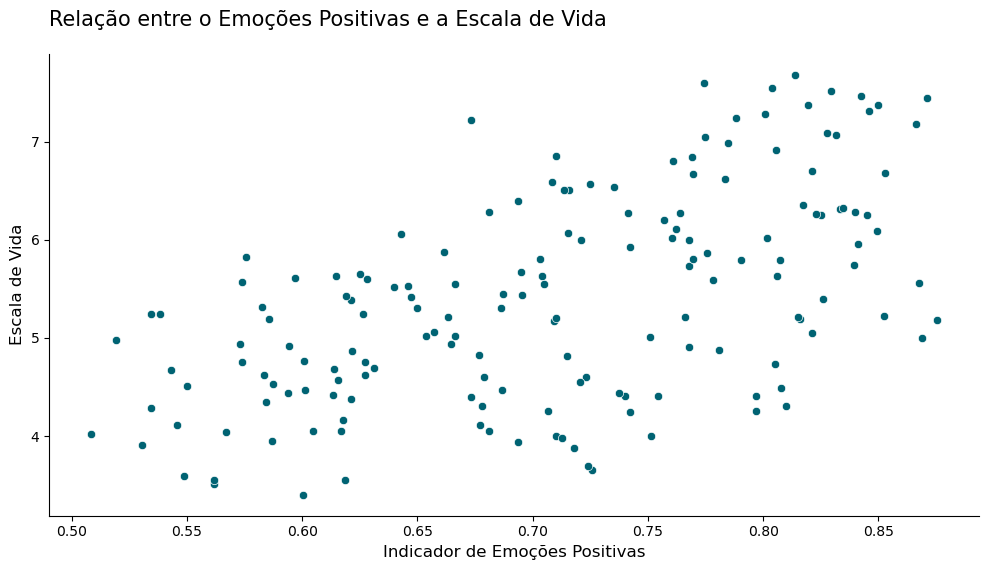

In [27]:
# Plotando o gráfico

plot_chart(df_mean, 'scatterplot', 'IndicadorEmocoesPositivas', 'IndicadorNivelVida', color="#006373", 
           title='Relação entre o Emoções Positivas e a Escala de Vida', xlabel='Indicador de Emoções Positivas',
           ylabel='Escala de Vida')

<h3 style="color: #cca002"><strong>Observações:</strong></h3>

Sim, quando maior é a a escala de vida maior é o índice de felicidade do público. 

<h3> O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?</h3>

In [28]:
# Buscando o país com menor índice de suporte 

df_mean.loc[df_mean['SuporteSocial'] == min(df_mean['SuporteSocial'])]

,Pais,IndicadorNivelVida,PIB_Per_Capita,SuporteSocial,ExpectativaVida,IndicadorLiberdade,IndicadorGenerosidade,IndicadorCorrupcao,IndicadorEmocoesPositivas,IndicadorEmocoesNegativas
26,Central African Republic,3.515,6.961,0.4024,43.356,0.6804,0.027,0.842,0.5616,0.3914


In [29]:
max(data_socio['SuporteSocial'])

0.987

In [30]:
max(data_socio['IndicadorCorrupcao'])

0.983

<h3 style="color: #cca002"><strong>Observações:</strong></h3>

Buscamos o país que teve a menor média de suporte social durante os anos de pesquisas e esse país é o **Central African Republic** com um média de 0.40,  menos da metade do valor máxino de suporte social. E o indicador de corrupção do Central African Republic é **0.87**, muito próximo do maior indicador de corrupção. 

<h3>Quais países apresentam os maiores e menores médias de indicadores de generosidade?</h3>

In [74]:
# Maiores países

df_max = df_mean.sort_values('IndicadorGenerosidade', 
                             ascending=False)[['Pais', 'IndicadorGenerosidade']].head(10)

df_max = df_max.rename(columns={"Pais": "Países", "IndicadorGenerosidade": "Indicador de Genorosidade"})

# Piores países 

df_min = df_mean.sort_values('IndicadorGenerosidade', 
                             ascending=False)[['Pais', 'IndicadorGenerosidade']].tail(10)

df_min = df_min.rename(columns={"Pais": "Países", "IndicadorGenerosidade": "Indicador de Genorosidade"})

In [75]:
df_max = format_dataframe(df_max, "Países com as melhores médias de Generosidade", 
                 "Indicador de Genorosidade")

In [76]:
df_min = format_dataframe(df_min, "Países com as piores médias de Generosidade", 
                 "Indicador de Genorosidade")

In [77]:
from IPython.core.display import display, HTML

# converte as tabelas para HTML
df_max = df_max.to_html(index=False)
df_min = df_min.to_html(index=False)

# cria um código HTML com duas colunas
html_code = f'''
    <div style="display:flex; justify-content: space-between">
        <div style="width:50%;">
            {df_max}
        </div>
        <div style="width:50%;">
            {df_min}
        </div>
    </div>
'''

# exibe o HTML com as tabelas lado a lado
display(HTML(html_code))


,Países,Indicador de Genorosidade
101,Myanmar,0.6188888888888889
64,Indonesia,0.39735714285714285
148,Thailand,0.3814666666666667
50,Gambia,0.3203333333333333
58,Haiti,0.30763636363636365
15,Bhutan,0.29933333333333334
157,United Kingdom,0.29067354838709675
92,Malta,0.28534193548387093
79,Laos,0.2711111111111111
104,Netherlands,0.25665023041474655


<h3>Quais são os países com os maiores e menores médias de indicadores de corrupção?</h3>

In [35]:
print("Países com maiores média de Corrupção:\n", df_mean.sort_values('IndicadorCorrupcao', ascending=False)[
    ['Pais', 'IndicadorCorrupcao']].head())

print( )

print("Países com menores média de Corrupção:\n", df_mean.sort_values('IndicadorCorrupcao', ascending=False)[
    ['Pais', 'IndicadorCorrupcao']].tail())

Países com maiores média de Corrupção:
                        Pais  IndicadorCorrupcao
122                 Romania            0.953231
17   Bosnia and Herzegovina            0.944154
20                 Bulgaria            0.942000
96                  Moldova            0.933733
155                 Ukraine            0.932600

Países com menores média de Corrupção:
             Pais  IndicadorCorrupcao
105  New Zealand            0.266214
47       Finland            0.249000
39       Denmark            0.200467
124       Rwanda            0.186000
129    Singapore            0.147779
